# Fined tuning models

Goal : From the dataset containing Post Event and Pre Event images with segmentation masks from MS building footprint dataset, we want to build different useful Computer Vision models like a Classifier, an Object detector and an Instance Segmentation model using different techniques like Transfert learning. A labelising work is required to build stronger model on different task. We propose to use Active Learning to find the most relevant items and Conformal prediction on Classification and Segmentation task. 

Some stats about the data : 
- more than 10 000 tiles from the raw high quality tiff images. 

Most useful files :
- damage_detection/filtered_jpeg_tiles/Post_Event_Grids_In_jpeg
- damage_detection/filtered_jpeg_tiles/Post_Event_Grids_mask_jpeg
- damage_detection/filtered_jpeg_tiles/Pre_Event_Grids_In_jpeg

We consider the masks are the same for Pre and Post Event images.


In [1]:
import geopandas as gpd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import folium

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Others
import os
import shutil
import zipfile

from tqdm import tqdm
import glob

In [9]:
# Open the geotiff file
import re 
def extract_title_ij(filename):
    pattern_base = r"(\w+)/tile_(\d+)_(\d+).jpg"
    pattern_mask = r"(\w+)/tile_(\d+)_(\d+)_mask.jpg"
    match_base = re.search(pattern_base, filename)
    match_mask = re.search(pattern_mask, filename)
    if match_base:
        title , i, j = map(str, match_base.groups())
        return title, i, j
    if match_mask:
        title , i, j = map(str, match_mask.groups())
        return title, i, j
    return None, None, None

def load_and_visualize(image_path):
    """
    display a tif image (little tiles are recommended)
    """
    with rasterio.open(image_path) as src:
        # Read the red, green, and blue bands directly into a 3D array
        image_rgb = src.read([1, 2, 3])  # Read bands 1, 2, and 3 in a single call
        # Transpose the array for correct display (optional)
        image_rgb = image_rgb.transpose(1, 2, 0)

        title , i, j = extract_title_ij(image_path)

        # Display the RGB composite image
        plt.imshow(image_rgb)
        plt.title(f"Image from {title} at position (i={i},j={j})")
        plt.show()

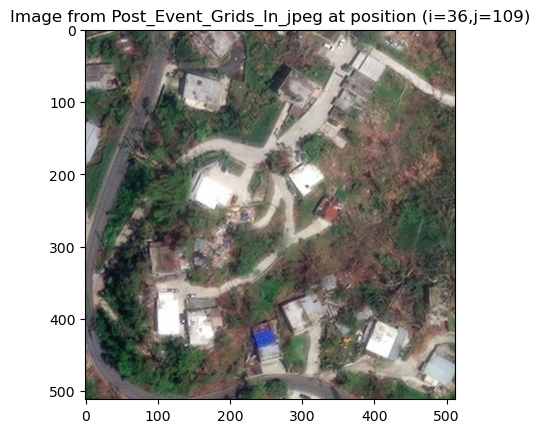

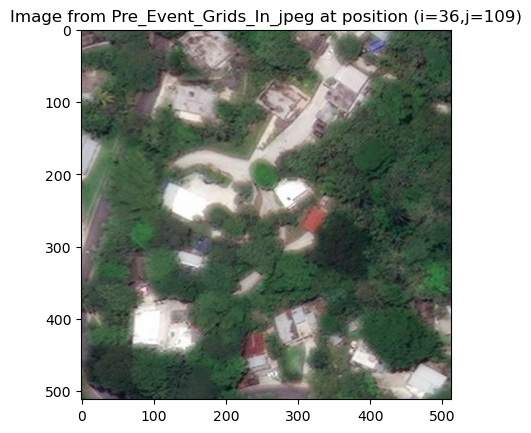

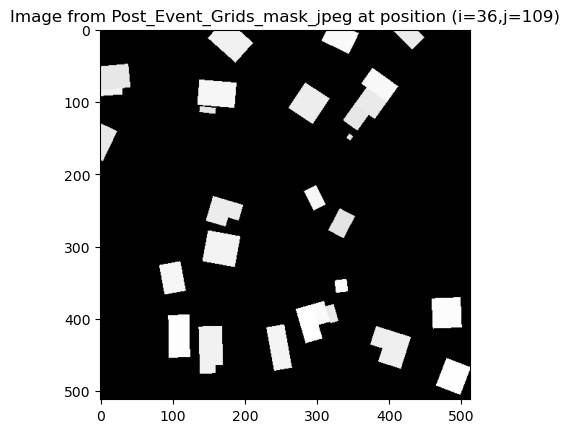

In [10]:
i = 36
j = 109

load_and_visualize(f"Post_Event_Grids_In_jpeg/tile_{i}_{j}.jpg")
load_and_visualize(f"Pre_Event_Grids_In_jpeg/tile_{i}_{j}.jpg")
load_and_visualize(f"Post_Event_Grids_mask_jpeg/tile_{i}_{j}_mask.jpg")